<a href="https://colab.research.google.com/github/DreamTeamInc/Core-DS/blob/issues%2F1/Core_EDA_Andrew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Path to 'sample_core_analysis_data_example' folder with folder name
path_to_data = 'drive/My Drive/ sample_core_analysis_data_example'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Initializing packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import cv2 as cv
import seaborn as sns

from PIL import Image
from skimage import exposure
from skimage import io

import sklearn
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [5]:
data = pd.read_csv(path_to_data + '/data.csv')
data

,task_id,photo_id,photo_type,segment_num,segment_type,segment_value
0,c6a24494_7931_4ca9_a148_f1fd9785b607,1012473,УФ,0,Свечение,Насыщенное
1,c6a24494_7931_4ca9_a148_f1fd9785b607,1012473,УФ,1,Свечение,Отсутствует
2,cfb8e7b2_7c98_4bd4_897d_0e5e95801bc9,1016625,УФ,0,Свечение,Карбонатное
3,a9d8f546_9046_46ce_ba17_abda344a0980,1013361,УФ,0,Свечение,Карбонатное
4,eb09a8aa_6c77_41de_8489_f5a390c789e8,1016727,УФ,0,Свечение,Карбонатное
...,...,...,...,...,...,...
14910,de63ac27_e98e_459a_9672_b07415228a50,1009408,ДС,6,Разрушенность,Разлом
14911,de63ac27_e98e_459a_9672_b07415228a50,1009408,ДС,7,Разрушенность,Разлом
14912,de63ac27_e98e_459a_9672_b07415228a50,1009408,ДС,8,Разрушенность,Разлом
14913,de63ac27_e98e_459a_9672_b07415228a50,1009408,ДС,9,Разрушенность,Разлом


## **Functions for getting data** 

In [7]:
def get_photo(data,i):
  return io.imread(path_to_data + '/photos/{}.jpeg'.format(data['photo_id'][i]))

def get_photo_by_id(data,id):
  return io.imread(path_to_data + '/photos/{}.jpeg'.format(id))

def get_mask(data, i):
    return np.load(path_to_data + '/matrixes/matrix_{}__{}.npz'.format(data['photo_id'][i], data['task_id'][i]))['data']

def get_json(data,i):
  with open(path_to_data + '/extra/extra_{}__{}.json'.format(data['photo_id'][i],data['task_id'][i])) as json_data:
    d = json.load(json_data)
    json_data.close()
  return d

## **Functions for displaying data**


In [8]:
def show_image(image,nrows=1,ncols=1,cmap='gray'):
  fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
  ax.imshow(image)
  ax.axis('off')
  return fig, ax

def show_all_photo_data(data,i):
  print(data.iloc[i])
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
  ax1.imshow(get_photo(data, i))
  
  mask = get_mask(data,i)
  cmap = plt.get_cmap('tab20b', np.max(mask) + 1)
  mask = ax2.imshow(mask, cmap=cmap,vmin=-0.5, vmax=np.max(get_mask(data, i))+0.5)
  ax2.axis('off')
  fig.colorbar(mask, ticks=np.arange(0, np.max(get_mask(data, i))+1))
  return fig, (ax1, ax2)

def show_photo_series(data, column, value):
    fig, ax_ar = plt.subplots(1, 10, figsize=(14, 14))
    filt_data = data[data[column] == value]
    i = np.random.randint(0, filt_data.shape[0])
    for ax in ax_ar:
        filt_by_photo = filt_data[filt_data['photo_id'] == filt_data['photo_id'].iloc[i]]
        segments = filt_by_photo['segment_num'].values
        photo = get_photo(data, filt_by_photo.index.values[0])
        mask = get_mask(data, filt_by_photo.index.values[0])
        for value in segments:
            mask = np.ma.masked_where(mask == value, mask)
        
        ax.imshow(photo)
        ax.imshow(mask)
        ax.axis('off')
        filt_data.drop(filt_by_photo.index.values, axis=0, inplace=True)
        i = np.random.randint(0, filt_data.shape[0])
    
    return fig, ax_ar

## **Data categorization**

In [ ]:
df = pd.DataFrame(0,index=np.array(range(1, 2061)),
                  columns=np.array(range(1, 21)))

In [ ]:
df = df.rename(columns = {1:'photo_id',2:'УФ',3:'ДС',4:'Насыщенное',5:'Отсутствует',6:'Карбонатное',7:'Разлом',8:'Проба',
                     9:'Аргиллит',10:'Переслаивание пород',11:'Алевролит глинистый',12:'Песчаник',13:'Глинисто-кремнистая порода',14:'Песчаник глинистый',
                     15:'Уголь',16:'Аргиллит углистый',17:'Алевролит',18:'Карбонатная порода',19:'Известняк',20:'Глина аргиллитоподобная'})

df['photo_id'] = data['photo_id'].unique()

In [ ]:
data[data['segment_value'] == 'Аргиллит'].shape

(757, 6)

In [ ]:
def categorical_features_transform(data,df,column_name):
  for pi in df['photo_id'].tolist():
    d = data[data['photo_id'] == pi]
    for value in d[column_name].values:
      df.loc[df['photo_id'] == pi,value] = 1
  return df

In [ ]:
df = categorical_features_transform(data,df,'photo_type')
df = categorical_features_transform(data,df,'segment_value')

df.to_csv('data_categorization.csv', index=False, header=False)

In [ ]:
df

,photo_id,УФ,ДС,Насыщенное,Отсутствует,Карбонатное,Разлом,Проба,Аргиллит,Переслаивание пород,Алевролит глинистый,Песчаник,Глинисто-кремнистая порода,Песчаник глинистый,Уголь,Аргиллит углистый,Алевролит,Карбонатная порода,Известняк,Глина аргиллитоподобная
1,1012473,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1016625,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1013361,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1016727,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1003985,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,1012723,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2057,1003764,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
2058,1002852,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2059,1009408,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
plt.figure(figsize = (14,14),dpi = 80)
sns.heatmap(df.corr(),xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram of signs',fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.savefig('heatmap.png')

# **Preprocessing**

## **Analysis of pictures in ultraviolet**

In [9]:
uv_data = data=data[data['photo_type'] == 'УФ']

In [10]:
uv_data.reset_index(inplace = True, drop = True)
uv_data = uv_data.assign(histogram_features = 0)

## **Using distribution histogram descriptor**

In [ ]:
from skimage.color import rgb2gray

for i in range(uv_data.shape[0]):
  segment_num = uv_data['segment_num'].iloc[i]
  part_of_photo = np.ma.masked_where(get_mask(uv_data,i) == segment_num, rgb2gray(get_photo(uv_data,i)))
  hist = np.histogram(part_of_photo.mask * part_of_photo.data, bins = 64, range = (0,1))
  uv_data['histogram_features'].iloc[i] = np.array(hist[0][1:] / np.sum(part_of_photo.mask),dtype=object)

In [ ]:
uv_data.to_csv('uv_data_with_segments_feature.csv', index=False)

In [ ]:
train_data = pd.DataFrame(data=0,columns = range(uv_data['histogram_features'][0].shape[0] + 1),index=range(1805))

In [ ]:
for i in range(train_data.shape[0]):
  for k in range(uv_data['histogram_features'][0].shape[0]):
    train_data[k].loc[i] = uv_data['histogram_features'][i][k]
  train_data[63].loc[i] = uv_data['segment_value'].loc[i]

In [ ]:
train_data.to_csv('train_data_histogram_features.csv', index=False)

In [ ]:
train_data = pd.read_csv('drive/My Drive/data/train_data_histogram_features.csv')

In [ ]:
y = train_data['63']
train_data.drop(['63'],axis='columns', inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.3, shuffle=False)

## **SVM**

In [322]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

y = uv_data['segment_value']
#y = uv_data['segment_value'][:500]

In [300]:
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV


parametrs = {'kernel':('linear', 'rbf'), 'C':[1, 10],'degree':[3,4,5,6,7,8],
             'tol':[1e-3,1e-4,5e-4]}
svc = svm.SVC()

clf = GridSearchCV(svc,parametrs)


clf.fit(X_train,y_train)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_degree',
 'param_kernel',
 'param_tol',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [301]:
clf.best_params_

{'C': 10, 'degree': 3, 'kernel': 'rbf', 'tol': 0.001}

In [339]:
X = features_arr

In [349]:
from sklearn import svm, metrics
from sklearn.model_selection import cross_validate


classifier = svm.SVC(C=12,degree=3,kernel='rbf',tol=0.001)

scores = cross_validate(classifier, X, y, scoring='f1_macro')


In [351]:
sum(scores['test_score'])/5

0.8383604454416711

## **RandomForestClassifier**

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



parametrs = {'n_estimators' : [320,330,340],'random_state' : [0],
             'criterion':['gini', 'entropy']}

rfc = RandomForestClassifier()

clf = GridSearchCV(rfc,parametrs)


clf.fit(X_train,y_train)

clf.best_params_

In [352]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate


forest = RandomForestClassifier(criterion='entropy',random_state=0)



scores = cross_validate(forest, X, y, scoring='f1_macro')

sum(scores['test_score'])/5

0.8555037004596497

In [327]:
scores = cross_val_score(forest, X_test, y_test, cv=5)
scores

array([0.87155963, 0.91743119, 0.89814815, 0.9537037 , 0.90740741])

## **3-chanel histogram with equalization**

In [241]:
def histogram_equalize(img): 
    #img = rgb2gray(img) 
    img_cdf, bin_centers = exposure.cumulative_distribution(img) 
    return np.interp(img, bin_centers, img_cdf)

In [ ]:
from PIL.ImageFilter import  MedianFilter

features_arr = []
for i in range(uv_data.shape[0]):
  segment_num = uv_data['segment_num'].iloc[i]
  photo = get_photo(uv_data,i)
  mask = get_mask(uv_data,i)
  photo = histogram_equalize(photo)
  part_of_photo0 = np.ma.masked_where(mask == segment_num, photo[:,:,0])
  part_of_photo1 = np.ma.masked_where(mask == segment_num, photo[:,:,1])
  part_of_photo2 = np.ma.masked_where(mask == segment_num, photo[:,:,2])
  print(i)

  #photo[:,:,0] = part_of_photo0.data * part_of_photo0.mask 
  #photo[:,:,1] = part_of_photo1.data * part_of_photo1.mask 
  #photo[:,:,2] = part_of_photo2.data * part_of_photo2.mask 

  hist0 = np.histogram(part_of_photo0.mask * part_of_photo0.data, bins = 32, range = (0,1))
  hist1 = np.histogram(part_of_photo1.mask * part_of_photo1.data, bins = 32, range = (0,1))
  hist2 = np.histogram(part_of_photo2.mask * part_of_photo2.data, bins = 32, range = (0,1))
  
  hist = np.concatenate((np.array(hist0[0][1:] / np.sum(part_of_photo0.mask),dtype=object),
                        np.array(hist1[0][1:] / np.sum(part_of_photo1.mask),dtype=object),
                        np.array(hist2[0][1:] / np.sum(part_of_photo2.mask),dtype=object)))
  features_arr.append(list(hist))

## **ExtraTrees**

In [353]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(criterion= 'gini',max_features= 'auto')

scores = cross_validate(etc, X, y, scoring='f1_macro')

sum(scores['test_score'])/5

0.8502890979095301

In [181]:
np.save("hist_equalization_features",features_arr)

In [182]:
features_arr = np.load("drive/My Drive/data/hist_equalization_features.npy")

## **Apply filters to images**

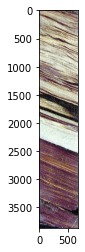

In [247]:
photo = get_photo(uv_data,0)
photo = histogram_equalize(photo)
plt.imshow(photo)

In [262]:
uv_data[uv_data['photo_id'] == uv_data['photo_id'].iloc[5]]

,task_id,photo_id,photo_type,segment_num,segment_type,segment_value,histogram_features
5,d9d6afc4_a213_4ae7_b86f_05d6c99457ef,1003985,УФ,0,Свечение,Карбонатное,0
6,d9d6afc4_a213_4ae7_b86f_05d6c99457ef,1003985,УФ,1,Свечение,Отсутствует,0
7,d9d6afc4_a213_4ae7_b86f_05d6c99457ef,1003985,УФ,2,Свечение,Карбонатное,0


task_id               d9d6afc4_a213_4ae7_b86f_05d6c99457ef
photo_id                                           1003985
photo_type                                              УФ
segment_num                                              0
segment_type                                      Свечение
segment_value                                  Карбонатное
histogram_features                                       0
Name: 5, dtype: object


(<Figure size 720x720 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f032855eac8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f032824edd8>))

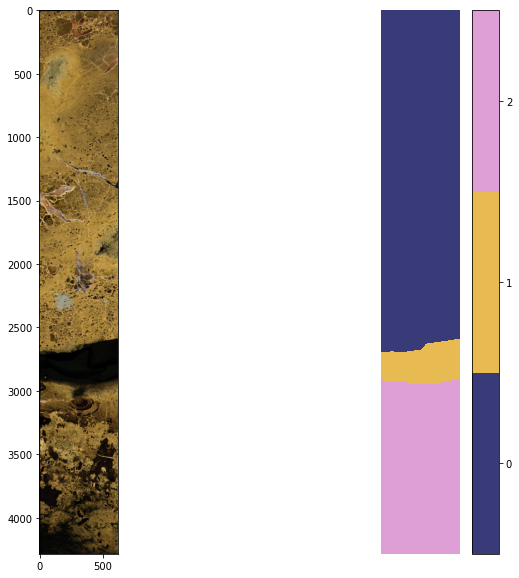

In [263]:
show_all_photo_data(uv_data,5)

task_id               c6a24494_7931_4ca9_a148_f1fd9785b607
photo_id                                           1012473
photo_type                                              УФ
segment_num                                              0
segment_type                                      Свечение
segment_value                                   Насыщенное
histogram_features                                       0
Name: 0, dtype: object


(<Figure size 720x720 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f03271174a8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f0327189da0>))

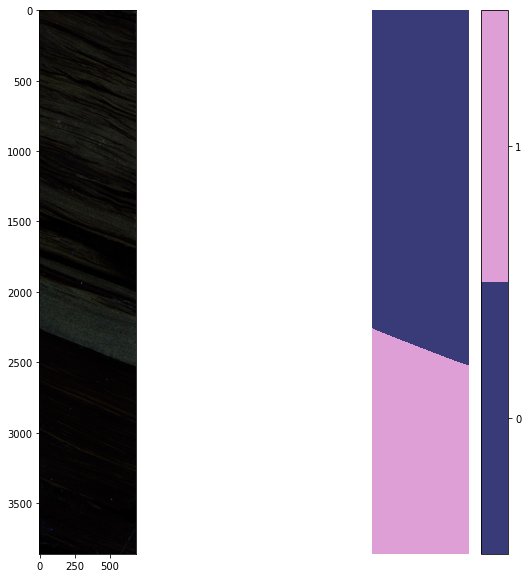

In [264]:
show_all_photo_data(uv_data,0)

In [258]:
from skimage.color import rgb2hsv

photo = get_photo(uv_data,0)

p = rgb2hsv(photo)

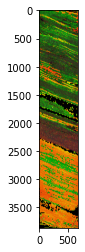

In [259]:
plt.imshow(p)

In [260]:
from skimage.color import rgb2hsv

photo = get_photo(uv_data,5)

p = rgb2hsv(photo)

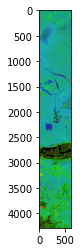

In [261]:
plt.imshow(p)

In [ ]:
from skimage import filters
from skimage.color import rgb2hsv

features_arr = []
for i in range(uv_data.shape[0]):
#for i in range(500):
  segment_num = uv_data['segment_num'].iloc[i]
  photo = get_photo(uv_data,i)
  mask = get_mask(uv_data,i)

  #photo1 = ndimage.uniform_filter(photo,size = 11)
  #photo2 = ndimage.gaussian_filter(photo, 3)
  #photo3 = ndimage.sobel(photo, axis=0, mode='constant')

  #photo = photo1 + photo2 + photo3

  photo = rgb2hsv(photo)

  part_of_photo0 = np.ma.masked_where(mask == segment_num, photo[:,:,0])
  part_of_photo1 = np.ma.masked_where(mask == segment_num, photo[:,:,1])
  part_of_photo2 = np.ma.masked_where(mask == segment_num, photo[:,:,2])
  print(i)

  #photo[:,:,0] = part_of_photo0.data * part_of_photo0.mask 
  #photo[:,:,1] = part_of_photo1.data * part_of_photo1.mask 
  #photo[:,:,2] = part_of_photo2.data * part_of_photo2.mask 

  hist0 = np.histogram(part_of_photo0.mask * part_of_photo0.data, bins = 32, range = (0,1))
  hist1 = np.histogram(part_of_photo1.mask * part_of_photo1.data, bins = 32, range = (0,1))
  hist2 = np.histogram(part_of_photo2.mask * part_of_photo2.data, bins = 32, range = (0,1))
  
  hist = np.concatenate((np.array(hist0[0][1:] / np.sum(part_of_photo0.mask),dtype=object),
                        np.array(hist1[0][1:] / np.sum(part_of_photo1.mask),dtype=object),
                        np.array(hist2[0][1:] / np.sum(part_of_photo2.mask),dtype=object)))
  features_arr.append(list(hist))